In [2]:
from solair.simulation import Simulator
from solair.design import Tube
import numpy as np
from time import time
from matplotlib import pyplot as plt

# Simulation with 1 row per heat exchanger

In [3]:
tube = Tube()
t0 = time()
simulator = Simulator(tube, verbose=1, max_iterations=100, n_rows=1)
simulator.run()
t1 = time()
print("Time:", t1 - t0)

Initial conditions:
t_co2_in: 306.15 t_air_in: 298.15
SHX 1 done.
Air average output temp: 299.51
CO2 outlet temp max/mean/min: 306.15/ 306.15/ 306.15
CO2 inlet temp of SHX 1: 308.18
SHX 2 done.
Air average output temp: 301.17
CO2 outlet temp max/mean/min: 308.18/ 308.18/ 308.18
CO2 inlet temp of SHX 2: 313.98
SHX 3 done.
Air average output temp: 304.20
CO2 outlet temp max/mean/min: 313.98/ 313.98/ 313.98
CO2 inlet temp of SHX 3: 335.98
SHX 4 done.
Air average output temp: 315.21
CO2 outlet temp max/mean/min: 335.98/ 335.98/ 335.98
CO2 inlet temp of SHX 4: 479.20
Simulation complete.
Average air outlet temp: 315.21
CO2 inlet temp: 479.20
Time: 5.396582126617432


In [4]:
t_co2 = np.array(simulator.results["t_co2"])

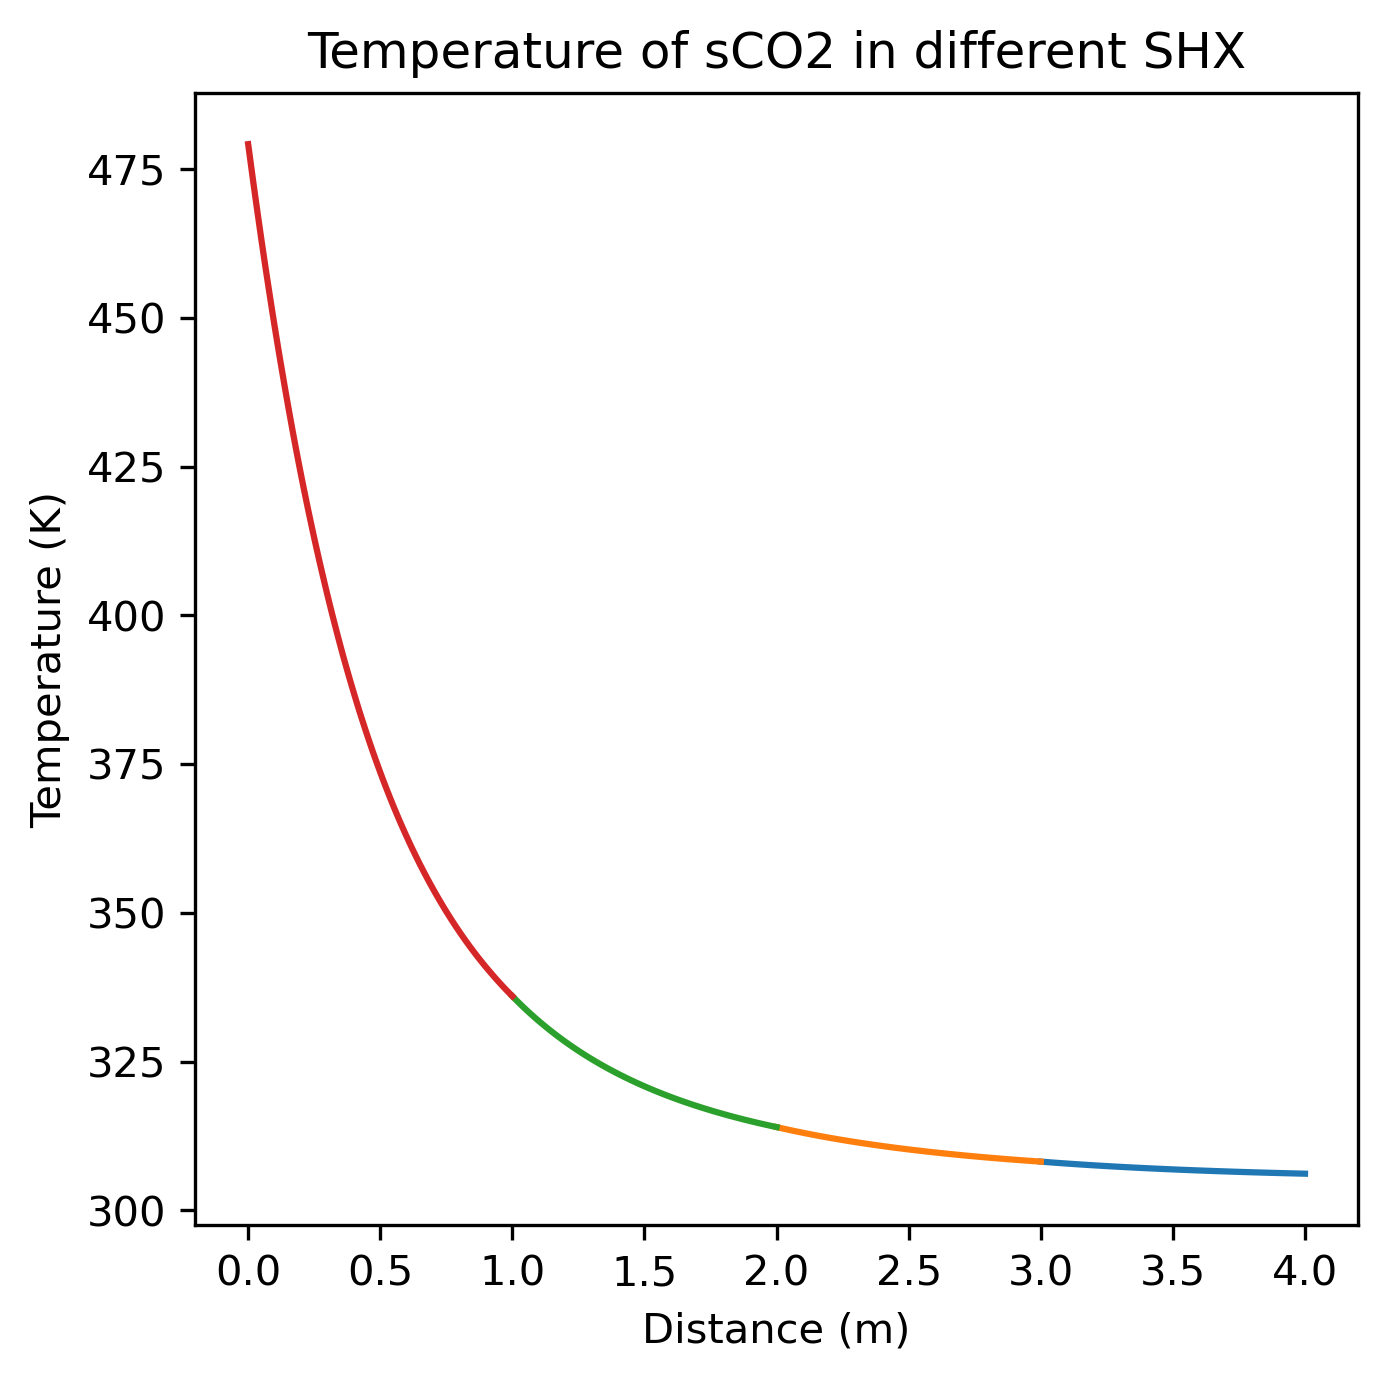

In [20]:
fig = plt.figure(figsize=(5,5), dpi=300)
x = np.arange(101) + 300
plt.title("Temperature of sCO2 in different SHX")
for i in range(len(t_co2)):
    segment = (x - 100 * i) / 100
    plt.plot(segment, t_co2[i])
    plt.xlabel("Distance (m)")
    plt.ylabel("Temperature (K)")
# plt.savefig("temp_profile.jpg")

# Simulation with 5 rows per SHX

In [9]:
tube = Tube()
t0 = time()
simulator = Simulator(tube, verbose=1, max_iterations=100, n_rows=5)
simulator.run()
t1 = time()
print("Time:", t1 - t0)

Initial conditions:
t_co2_in: 306.15 t_air_in: 298.15
SHX 1 done.
Air average output temp: 303.08
CO2 outlet temp max/mean/min: 306.85/ 306.53/ 306.15
CO2 inlet temp of SHX 1: 308.18
SHX 2 done.
Air average output temp: 303.99
CO2 outlet temp max/mean/min: 308.28/ 308.26/ 308.18
CO2 inlet temp of SHX 2: 311.04
SHX 3 done.
Air average output temp: 305.43
CO2 outlet temp max/mean/min: 311.09/ 311.08/ 311.04
CO2 inlet temp of SHX 3: 318.19
SHX 4 done.
Air average output temp: 308.67
CO2 outlet temp max/mean/min: 318.39/ 318.35/ 318.19
CO2 inlet temp of SHX 4: 346.10
Simulation complete.
Average air outlet temp: 308.67
CO2 inlet temp: 346.10
Time: 26.589056491851807


In [10]:
t_co2_5 = np.array(simulator.results["t_co2"])

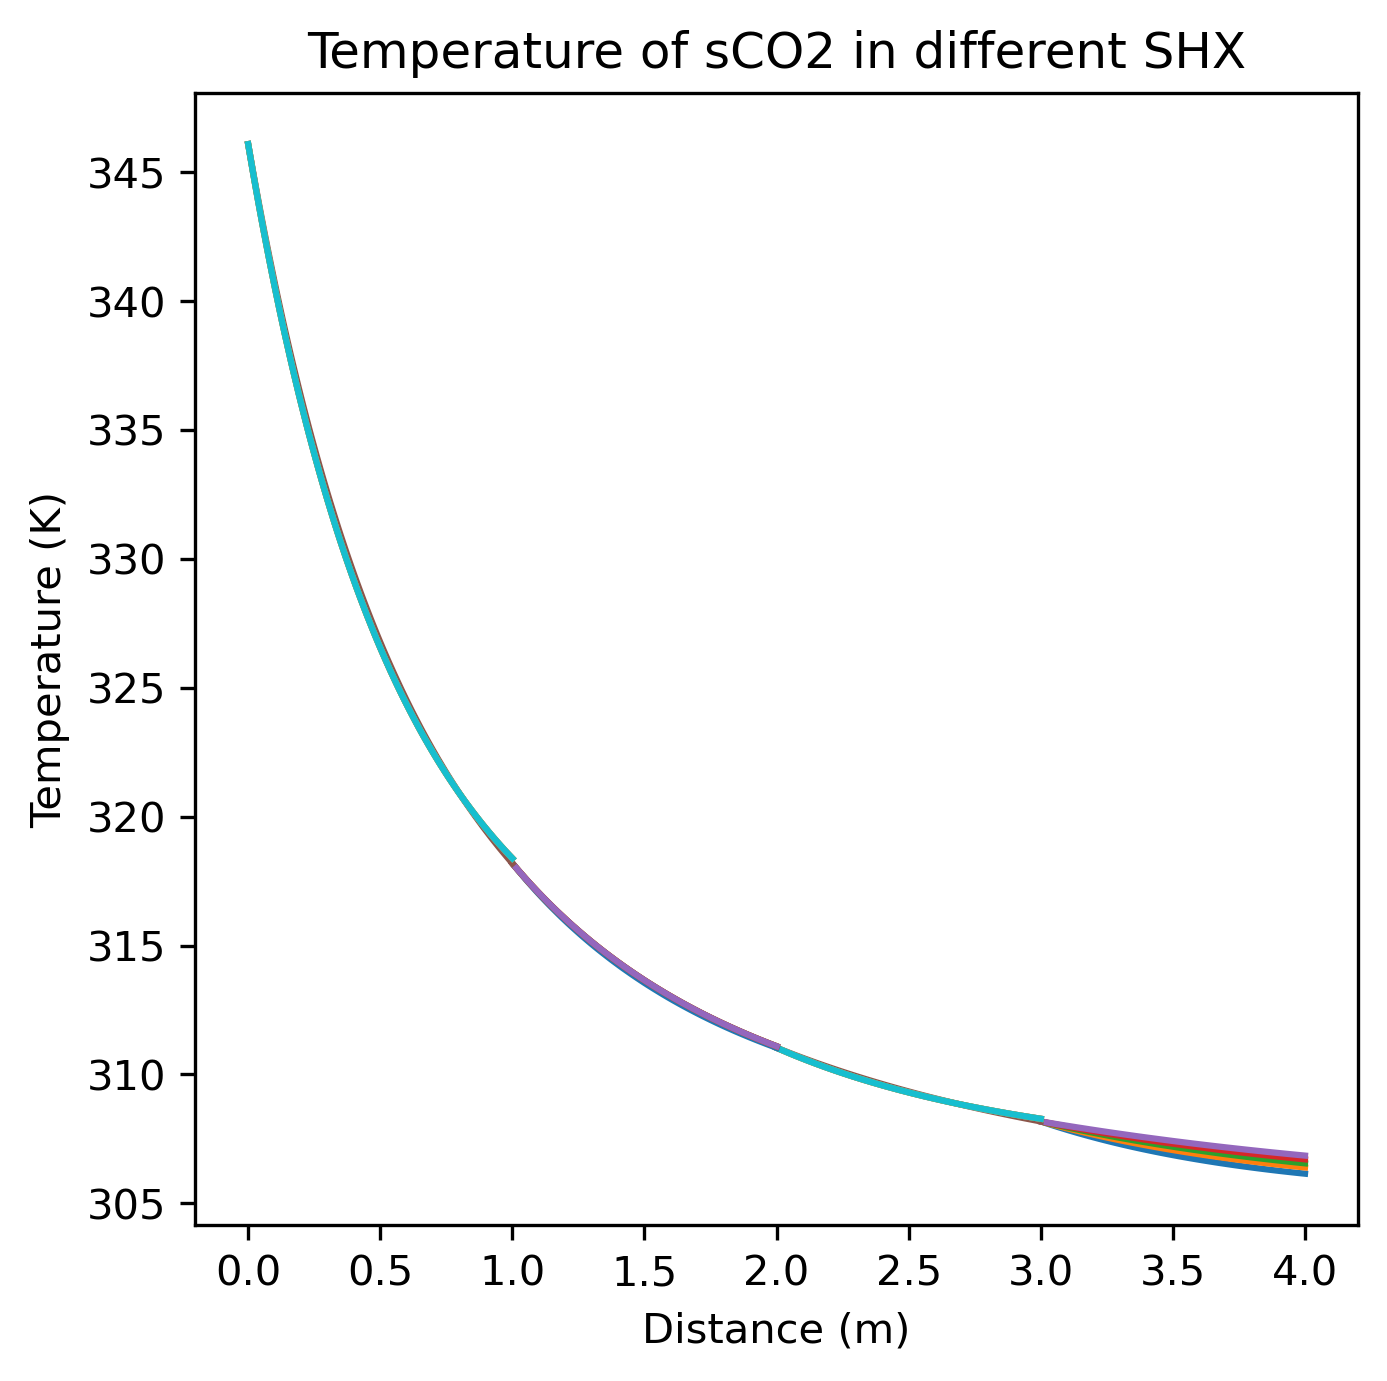

In [21]:
fig = plt.figure(figsize=(5,5), dpi=300)
x = np.arange(101) + 300
plt.title("Temperature of sCO2 in different SHX")
for i in range(0, len(t_co2_5)):
    segment = (x - 100 * ((i) // 5 )) / 100
    plt.plot(segment, t_co2_5[i])
    plt.xlabel("Distance (m)")
    plt.ylabel("Temperature (K)")
# plt.savefig("temp_profile.jpg")

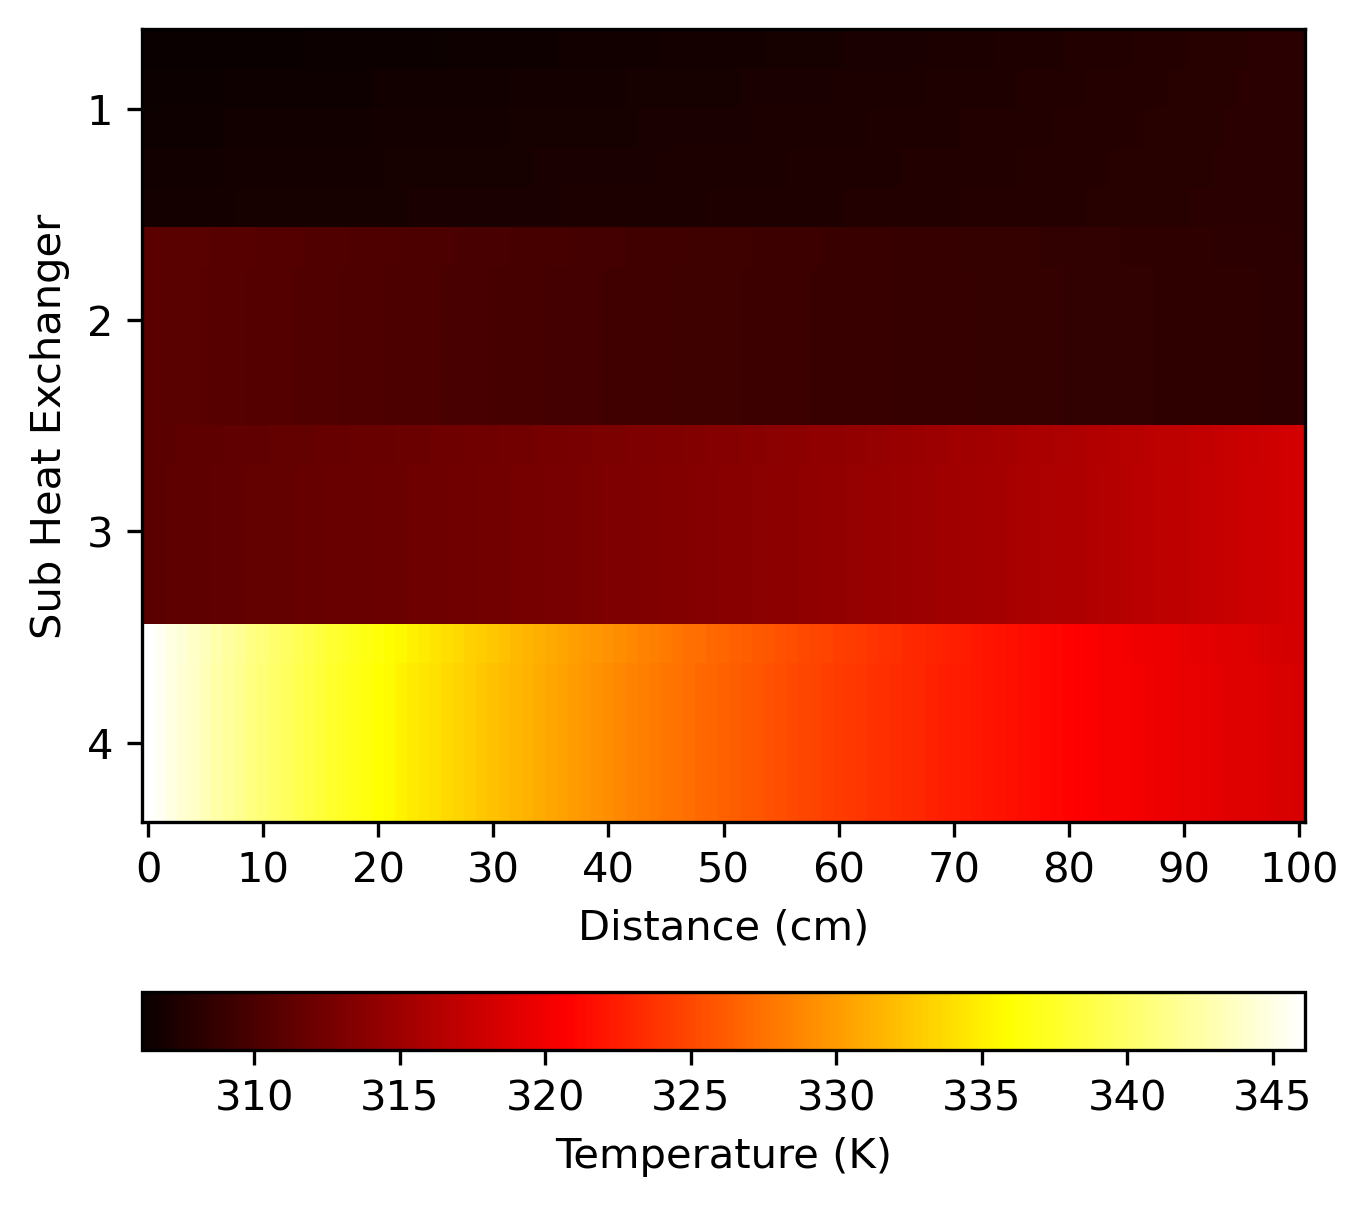

In [26]:
arr = t_co2_5.copy()
# this code makes each SHX outlet have the same temp as the next SHX inlet
# As the CO2 flows from one SHX to the next, it will take a U-turn
for i in range(0, len(arr)):
    if (i // 5) % 2 == 0:
        arr[i] = arr[i][::-1] 
# PLOT
fig = plt.figure(figsize=(5,5), dpi=300)
plt.imshow(arr, cmap="hot", aspect="auto")
plt.xticks(np.arange(0, 110, 10), np.arange(0, 110, 10))
plt.yticks(np.linspace(0, 16, 4) + 1.5, np.arange(1, 5))
plt.ylabel("Sub Heat Exchanger")
plt.xlabel("Distance (cm)")
plt.colorbar(label = "Temperature (K)", orientation="horizontal")
# plt.savefig("heatmap.jpg")